In [54]:
import numpy as np
import os
import gzip
import matplotlib.pyplot as plt

import tensorflow as tf
print('Versión de TensorFlow: ' + tf.__version__)

Versión de TensorFlow: 2.4.1


In [28]:
def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [29]:
ruta = '/content/drive/MyDrive/DIPLOMADO INTELIGENCIA ARTIFICIAL/TAREAS/2. Entendiendo Google Colab/fashion_mnist_data'

X_train, Y_train = load_mnist(ruta, kind='train')
X_test, Y_test = load_mnist(ruta, kind='test')

In [30]:
X_train.shape

(60000, 784)

In [31]:
Y_train.shape

(60000,)

In [32]:
X_test.shape

(10000, 784)

In [33]:
Y_test.shape

(10000,)

In [34]:
28*28 #IMAGENES DE 28px x 28px a 1 solo canal (blanco y negro)

784

In [38]:
59904/128

468.0

In [45]:
9984/128

78.0

Reshape de los datos

In [43]:
X_train = X_train[0:59904,:]
X_test = X_test[0:9984,:]
Y_train = Y_train[0:59904]
Y_test = Y_test[0:9984]

X_train = np.reshape(X_train,(59904,28,28,1))
X_test = np.reshape(X_test,(9984,28,28,1))
Y_train = np.reshape(Y_train,(59904,1))
Y_test = np.reshape(Y_test,(9984,1))

In [41]:
X_train.shape

(59904, 28, 28, 1)

In [44]:
Y_test.shape

(9984, 1)

In [50]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [49]:
K = len(np.unique(Y_train))
print("Numero de clases:", K)

Numero de clases: 10


Creacion del modelo con Keras


In [46]:
tf.random.set_seed(200)
model = tf.keras.models.Sequential()

In [53]:
X_train.shape[1:]

(28, 28, 1)

In [65]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(128, (5,5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(256, (5,5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(K))
model.add(tf.keras.layers.Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)        

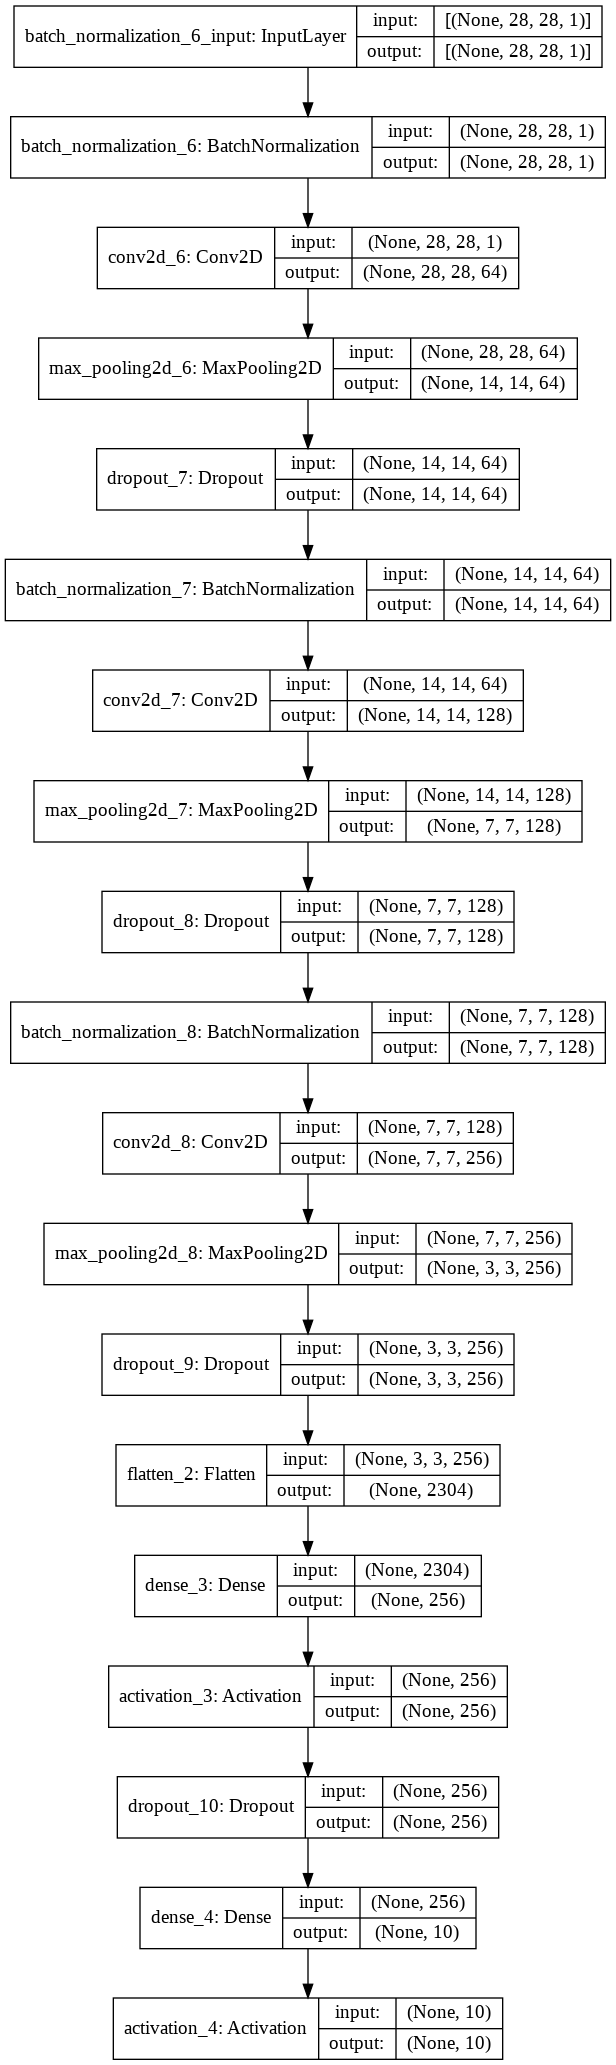

In [66]:
folder = '/content/drive/MyDrive/DIPLOMADO INTELIGENCIA ARTIFICIAL/TAREAS/2. Entendiendo Google Colab'

tf.keras.utils.plot_model(model, to_file= folder + 'Model1.png', show_shapes=True)

from IPython.display import Image

Image(retina=True, filename= folder + 'Model1.png')

In [67]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entrenamiento!!

In [68]:
import timeit

def entrenamiento_cpu():
  
  with tf.device('/cpu:0'):

    r = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=128,epochs=2,verbose=1)

  return None

cpu_time = timeit.timeit('entrenamiento_cpu()', number=1, setup='from __main__ import entrenamiento_cpu')

Epoch 1/2
468/468 [==============================] - 755s 2s/step - loss: 1.0919 - accuracy: 0.7001 - val_loss: 0.3939 - val_accuracy: 0.8633
Epoch 2/2
468/468 [==============================] - 754s 2s/step - loss: 0.4215 - accuracy: 0.8500 - val_loss: 0.3506 - val_accuracy: 0.8800


In [69]:
print('Tiempo de entrenamiento: ' + str(cpu_time) + ' segundos')

Tiempo de entrenamiento: 1508.8801119459995 segundos
